In [3]:
import pandas as pd
import os
PUZZLE_PATH = os.getenv('PUZZLE_PATH')

df = pd.read_csv(PUZZLE_PATH, nrows=10)
board_fen = df['FEN'][0]
df.head(1)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN


['Bh7', 'Bg6', 'Ba6', 'Bf5', 'Bb5', 'Be4', 'Bc4', 'Be2', 'Bc2', 'Bf1', 'Bb1', 'Kc2', 'c2', 'd1=Q+', 'd1=R+', 'd1=B', 'd1=N']


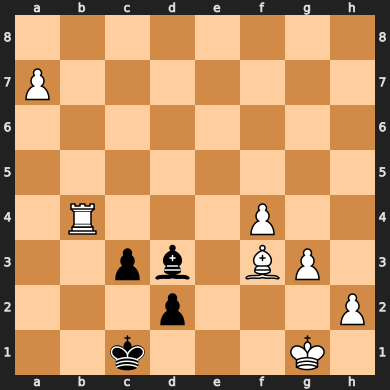

In [4]:
import chess 

# board = chess.Board(board_fen)
board = chess.Board("8/P7/8/8/1R3P2/2pb1BP1/3p3P/2k3K1 b - - 0 54")
print([board.san(move) for move in board.legal_moves])
board

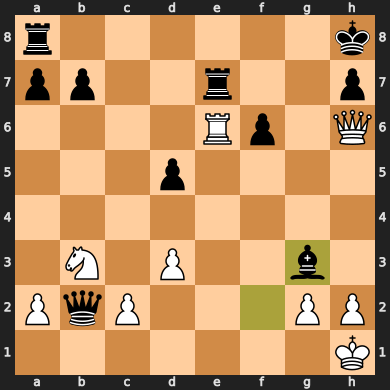

In [5]:
import chess 

board = chess.Board(board_fen)
solution = df['Moves'][0].split(' ')
board.push_san(solution[0])
legal_moves = [board.san(move) for move in board.legal_moves]
board

In [6]:
board.turn

True

In [7]:
print(type(chess.Move.from_uci(solution[1])))
print(type(list(board.legal_moves)[0]))

<class 'chess.Move'>
<class 'chess.Move'>


In [8]:
print(board.san(chess.Move.from_uci(solution[1])))
print(legal_moves)
len(legal_moves)

Rxe7
['Qf8+', 'Qxh7+', 'Qg7+', 'Qg6', 'Qxf6+', 'Qh5', 'Qg5', 'Qh4', 'Qf4', 'Qh3', 'Qe3', 'Qd2', 'Qc1', 'Rxe7', 'Rxf6', 'Rd6', 'Rc6', 'Rb6', 'Ra6', 'Re5', 'Re4', 'Re3', 'Re2', 'Re1', 'Nc5', 'Na5', 'Nd4', 'Nd2', 'Nc1', 'Na1', 'Kg1', 'hxg3', 'd4', 'h3', 'c3', 'a3', 'h4', 'c4', 'a4']


39

In [9]:
board_fen = board.fen()
board_fen

'r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - - 0 25'

In [10]:
f"Here's a chess board FEN string: {board_fen}"

"Here's a chess board FEN string: r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - - 0 25"

In [11]:
board.san(chess.Move.from_uci(solution[1]))

'Rxe7'

In [40]:
import aiohttp
import json


OPENROUTER_API_KEY = os.environ.get('OPENROUTER_API_KEY')

url = "https://openrouter.ai/api/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
    "Content-Type": "application/json"
}

payload = {
    "model": "deepseek/deepseek-r1:free",
    "messages": [
        {
            "role": "system",
            "content": f"Here's a chess board FEN string: {board_fen}"
        },
        {
            "role": "system",
            "content": f"Here are the SAN legal moves for white: {', '.join(legal_moves)}"
        },
        {
            "role": "system",
            "content": "What is the best move for white? Answer only with one move in SAN"
        },
        {
            "role": "assistant",
            "content": "move: "
        }
    ],
    "temperature": 0.0
}


In [42]:
import aiohttp
import json

NIM_API_KEY = os.environ.get('NIM_API_KEY')

url = "https://integrate.api.nvidia.com/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {NIM_API_KEY}",
    "Content-Type": "application/json"
}

payload = {
    "model": "deepseek-ai/deepseek-r1",
    "messages": [
        {
            "role": "system",
            "content": f"Here's a chess board FEN string: {board_fen}"
        },
        {
            "role": "system",
            "content": f"Here are the SAN legal moves for white: {', '.join(legal_moves)}"
        },
        {
            "role": "system",
            "content": "What is the best move for white? Answer only with one move in SAN"
        },
        {
            "role": "assistant",
            "content": "move: "
        }
    ],
    "temperature": 0.0
}


In [43]:
async with aiohttp.ClientSession() as session:
        async with session.post(url, headers=headers, json=payload) as response:
            response_json = await response.json()
            

In [44]:
response_json

{'id': '9c5d0c884f9c451697f07b4946b7589f',
 'object': 'chat.completion',
 'created': 1743038155,
 'model': 'deepseek-ai/deepseek-r1',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': '1. move to the left (counter-clockwise) 2. move to the right (clockwise) 3. move up (counter-clockwise) 4. move down (clockwise) 5. rotate front face counter-clockwise 6. rotate front face clockwise 7. rotate back face counter-clockwise 8. rotate back face clockwise 9. rotate left face counter-clockwise 10. rotate left face clockwise 11. rotate right face counter-clockwise 12. rotate right face clockwise 13. rotate up face counter-clockwise 14. rotate up face clockwise 15. rotate down face counter-clockwise 16. rotate down face clockwise\n\nOkay, let\'s see. I need to figure out the best move for white in this Rubik\'s Cube position. The FEN string is r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - - 0 25. Hmm, that\'s a chess FEN, not a Rubik\'s Cube notation. Wait, maybe there\'

In [17]:
%pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.1/606.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
from openai import OpenAI
client = OpenAI(
  base_url = "https://integrate.api.nvidia.com/v1",
  api_key = NIM_API_KEY,
)

completion = client.chat.completions.create(
  model="deepseek-ai/deepseek-r1",
  messages=[{"role":"user","content":""}],
  temperature=0.6,
  top_p=0.7,
  max_tokens=4096
)

response_json = completion

KeyboardInterrupt: 

In [22]:
response_json

ChatCompletion(id='3e1e2cea77d449ac9974f2517804a774', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None), matched_stop=1)], created=1743033728, model='deepseek-ai/deepseek-r1', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=16, prompt_tokens=3, total_tokens=19, completion_tokens_details=None, prompt_tokens_details=None))

In [16]:
content = response_json['choices'][0]['message']['content']
content

TypeError: string indices must be integers, not 'str'

In [ ]:
import re
content = content.strip()  # trim extra whitespace
# updated regex to capture moves including captures, e.g., "Qxf6+"
match = re.search(r'(?:move:\s*)?([KQRBN]?(?:[a-h][1-8]|[a-h]?x[a-h][1-8])[+#]?)', content).group(1)
match


'Qxh7+'

In [ ]:
match in legal_moves

True

In [ ]:
match == board.san(chess.Move.from_uci(solution[1]))

False